## 차원 축소에서는 주로 PCA를 사용하기 때문에 PCA를 구현해보겠습니다.


## 다음 코드를 실행시켜주세요

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [3]:
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


### 1-1) 주성분 분석을 위해 데이터 전처리 과정이 필요로 합니다.(25점)

1. 데이터 특징만으로만 구성된 dataframe을 생성해주고 StandardScaler를 통해 전처리 해주세요.(dataframe 변수명은 X로 해주세요)

2. 데이터프레임을 1개 더 생성하여, 데이터별 클래스를 저장해주세요. body_shape정보는 추후 차원 축소된 데이터를 시각화할 때, 데이터의 정보가 충분히 유지되었는지 확인하기 위해 사용됩니다.(변수명은 Y로 해주세요)


In [4]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

## 1-2) X dataframe의 공분산 행렬을 구해주시고, 고유값과 고유벡터를 구해주세요(25점)

1. 공분산 행렬, 고유값, 고유벡터는 변수에 값이 담겨져 있어야 합니다.


In [5]:
cov_matrix = np.cov(X, rowvar=False)
cov_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [6]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvectors)
print(eigenvalues)

[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


Eigenvectors 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]

Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


# 1-3) 5차원 데이터를 고유벡터로 사영시켜주세요.(25점)

1. 첫번째 고유벡터를 이용해서 사영시켜주시면 됩니다.

2. 힌트 : a 벡터를 b벡터에 사용시키는 공식인
dot(a,b) / magnitude of b 를 이용해서 사영시킬 수 있습니다.

In [7]:
first_eigenvector = eigenvectors[:, 0]

projected_data = np.dot(X, first_eigenvector) / np.linalg.norm(first_eigenvector)
projected_data

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

# 1-4) 시각화를 진행하겠습니다.(25점)

1. 주성분을 x축으로 하고, 1차원 데이터이므로 y축은 0으로 통일시킵니다.

2. 데이터의 이해를 위해서 클래스를 데이터 마지막 column에 포함시켜주세요

3. 마지막 그림과 같이 산점도를 출력해주시면 됩니다.:

In [8]:
df1 = pd.DataFrame({
    'PC1' : projected_data,
    'y-axis' : 0,
    'label' : df['body_shape']
})
df1

,PC1,y-axis,label
0,2.226009,0,Skinny
1,0.018143,0,Normal
2,-1.762966,0,Fat
3,2.735424,0,Skinny
4,-3.027115,0,Fat
5,2.147026,0,Skinny
6,0.371425,0,Normal
7,-2.592399,0,Fat
8,0.393478,0,Normal
9,-0.509025,0,Fat


,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


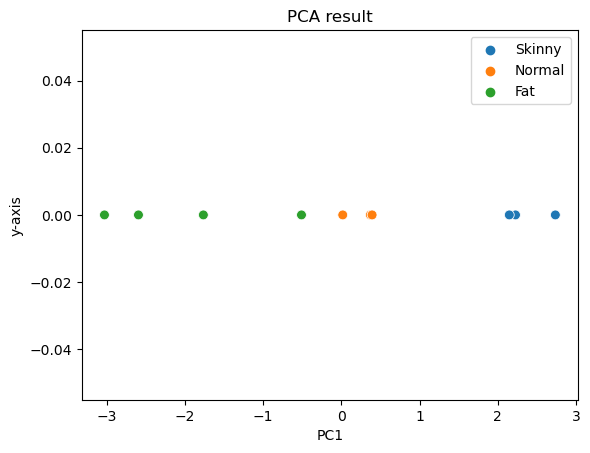

In [9]:
sns.scatterplot(data = df1, x = 'PC1', y = 'y-axis', hue = 'label', s = 50)
plt.xlabel('PC1')
plt.ylabel('y-axis')
plt.title('PCA result')
plt.legend()
plt.show()

Text(0.5, 1.0, 'PCA result')

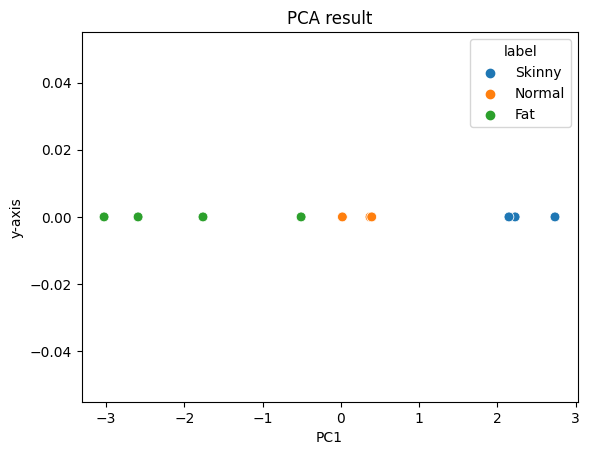

# 1. PCA와 LDA를 이용한 성별 분류(50점)

아래 데이터는 2016년 건강검진 데이터입니다. 아래 코드를 먼저 실행시켜주세요.

In [69]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt  
from IPython.display import set_matplotlib_formats
import seaborn as sns
sns.set_style('whitegrid')
#set_matplotlib_formats('retina')  
#matplotlib.rc('font', family='AppleGothic') 
matplotlib.rc('axes', unicode_minus=False) 


df = pd.read_csv("https://raw.githubusercontent.com/TaewoongKong/code_sharing/master/2016%E1%84%82%E1%85%A7%E1%86%AB_%E1%84%80%E1%85%A5%E1%86%AB%E1%84%80%E1%85%A1%E1%86%BC%E1%84%80%E1%85%A5%E1%86%B7%E1%84%8C%E1%85%B5%E1%86%AB_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5.csv")
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2016,465969,1,8,41,170.0,70.0,74.0,0.7,0.7,...,96.0,3.0,NaN,1,NaN,NaN,NaN,NaN,2.0,20171219
1,2016,565871,1,10,41,160.0,60.0,81.0,1.2,1.0,...,14.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
2,2016,115718,2,11,11,160.0,55.0,71.0,1.0,1.0,...,20.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0.0,20171219
3,2016,767524,1,6,28,180.0,70.0,79.0,1.0,0.9,...,16.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
4,2016,482178,2,9,11,160.0,60.0,85.0,0.8,1.2,...,13.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0.0,20171219


(1) 신장과 허리둘레를 통해 성별을 구분해보겠습니다. Your Code 부분을 채워주세요. (5점)

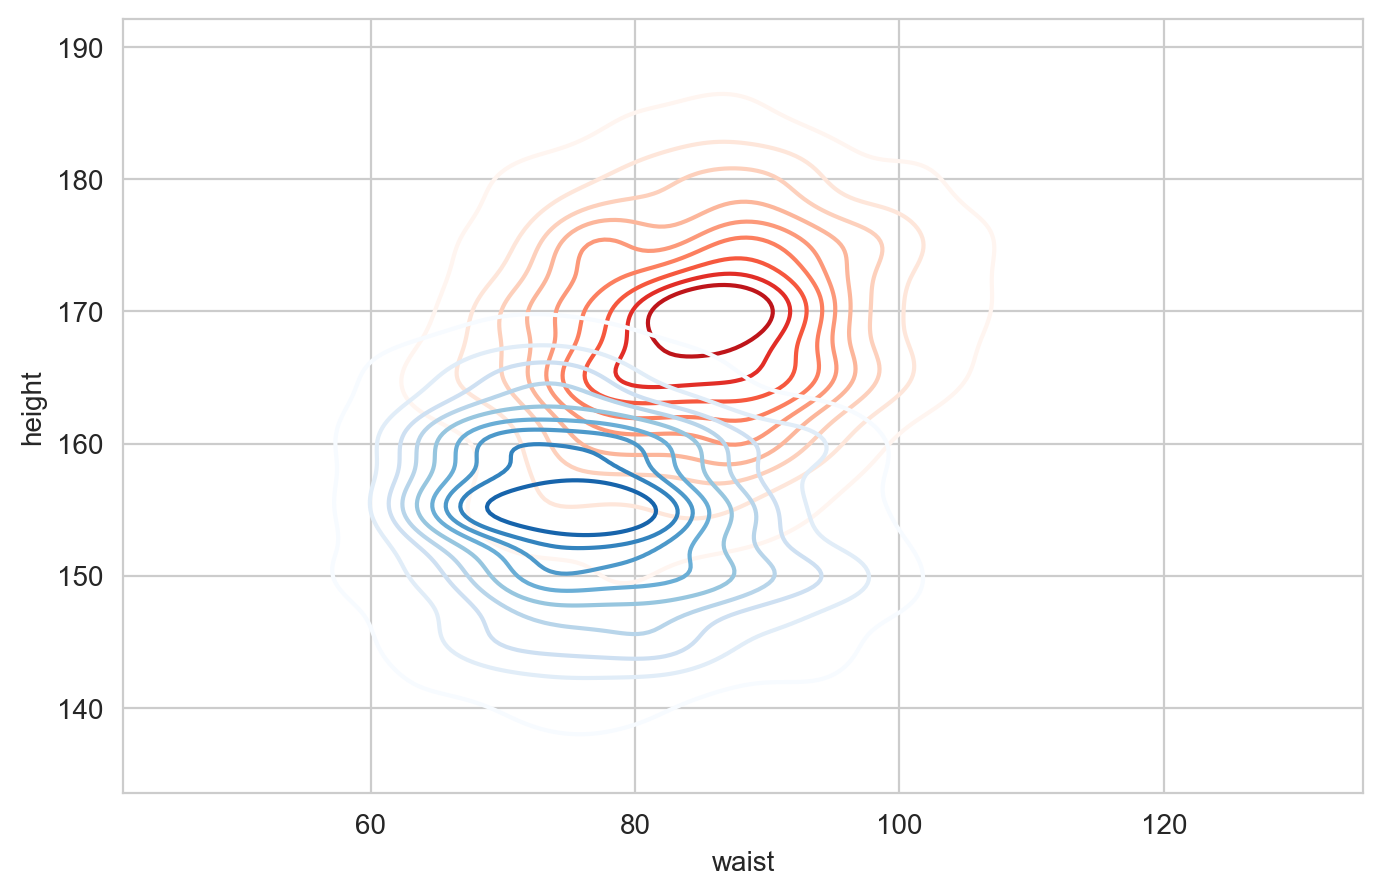

In [70]:
# 허리둘레, 신장, 성별코드 column만 추출해주세요.
df = df[['허리둘레', '신장(5Cm단위)', '성별코드']]
df.columns = ['waist', 'height', 'sex']


# 남녀 구분을 해주세요.
df_man = df.query('sex == 1')
df_woman = df.query('sex == 2')

# 분포가 어떤지 시각화 해봅니다.
# x 축에는 허리둘레, y축에는 키를 넣었습니다
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")


ax = sns.kdeplot(data = df_man, x = 'waist', y = 'height', cmap="Reds", cbar=False)
ax = sns.kdeplot(data = df_woman, x = 'waist', y = 'height', cmap="Blues")


red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]

(2) PCA 클래스를 입혀 신장과 허리둘레를 덩치라는 하나의 값으로 변환한 뒤 성별 간의 비교를 해보겠습니다.Your Code 부분을 채워주세요. (10점)

In [136]:
# 일단 허리둘레와 키 값을 정규화시켜줍니다
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['waist', 'height']])


from sklearn.decomposition import PCA
# PCA 적용 - 컴포넌트는 1로 설정합니다.
pca = PCA(n_components=1)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
df_pca = pca.fit_transform(df_scaled)

print(df_pca.shape)

(1000, 1)


(3) df_pca_component라는 데이터프레임을 만들어 pca를 적용하여 만든 덩치데이터와 성별데이터를 넣어주세요. (5점)

In [137]:
df_pca_component = pd.DataFrame(df_pca,columns=['df_pca_component'])
df_pca_component['target'] = df.sex

(4) distplot을 사용하여 덩치가 성별에 따라 어떻게 나뉘었는지 아래 그림과 같이  시각화해주세요. (10점)

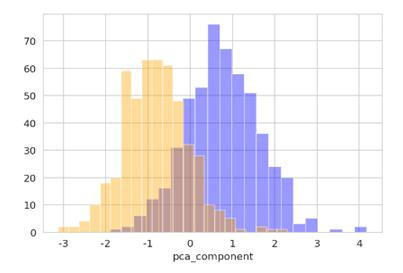

In [ ]:
from IPython.display import Image
Image("./noname02.jpg")

C:\Users\82109\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


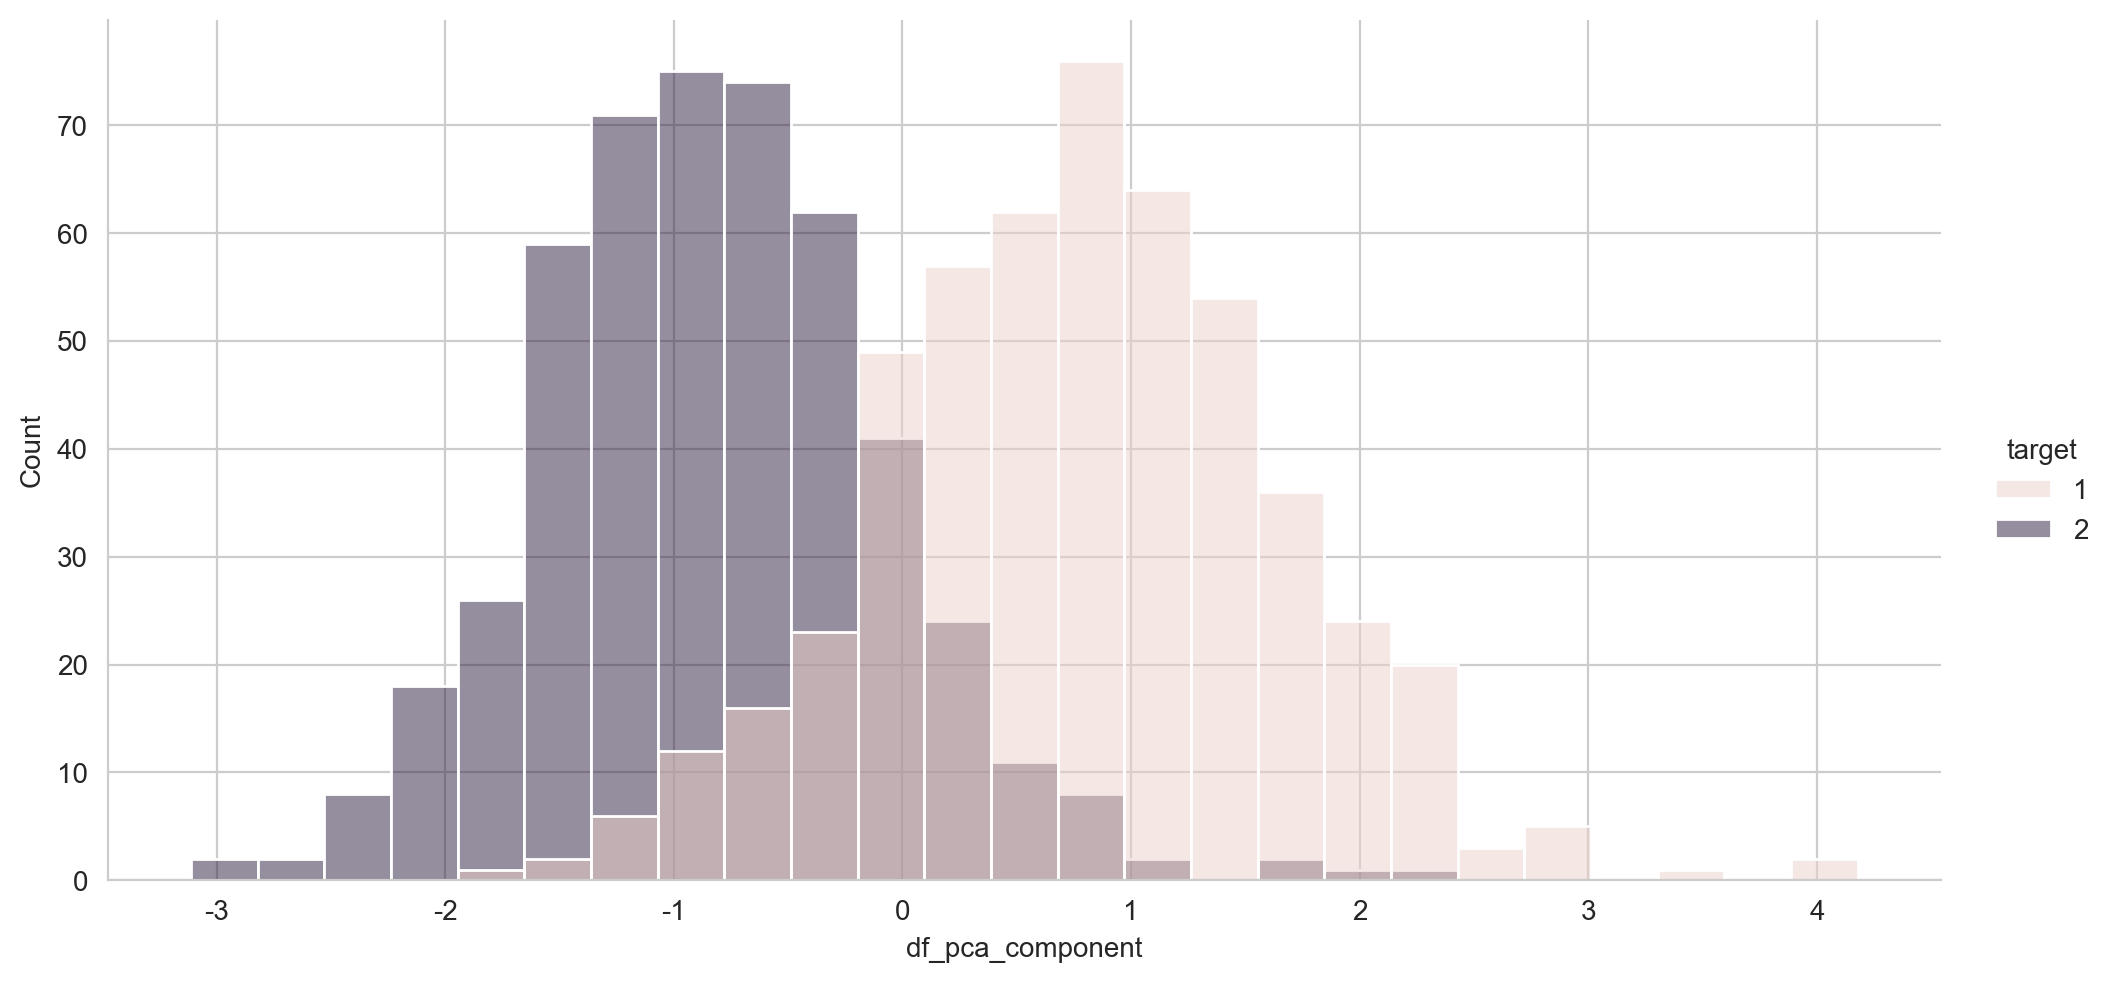

In [139]:
sns.displot(data = df_pca_component, x = df_pca_component['df_pca_component'], kind = 'hist', bins = 25, hue = 'target', aspect = 2)
plt.show()

(5) 같은 데이터를 LDA에서 적용시켜보겠습니다. Your Code 부분을 채워주세요. (5점)

In [157]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
# fit()과 transform() 호출
df_lda = scaler.fit_transform(df[['waist', 'height']])
    
df_lda_component = pd.DataFrame(df_lda, columns=['lda_component1', 'lda_component2'])
df_lda_component['target'] = df.sex

In [158]:
df_lda_component

,lda_component1,lda_component2,target
0,-0.732663,0.885236,1
1,-0.003334,-0.181313,1
2,-1.045233,-0.181313,2
3,-0.211714,1.951785,1
4,0.413425,-0.181313,2
...,...,...,...
995,0.517615,-1.247862,2
996,-1.566182,-0.714588,2
997,-1.566182,-0.714588,2
998,-0.107524,-1.781137,2


(6) 아래 그림과 같이 PCA의 결과와 LDA의 결과를 비교하기 위해 시각화해주세요. (15점)

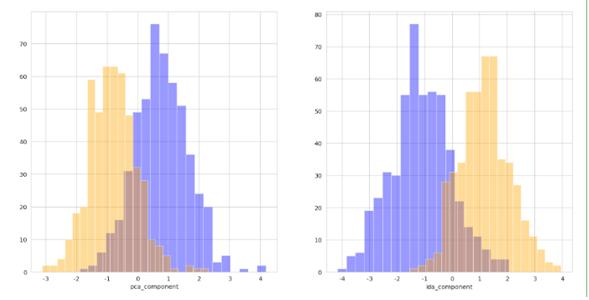

In [ ]:
from IPython.display import Image
Image("./noname03.jpg")

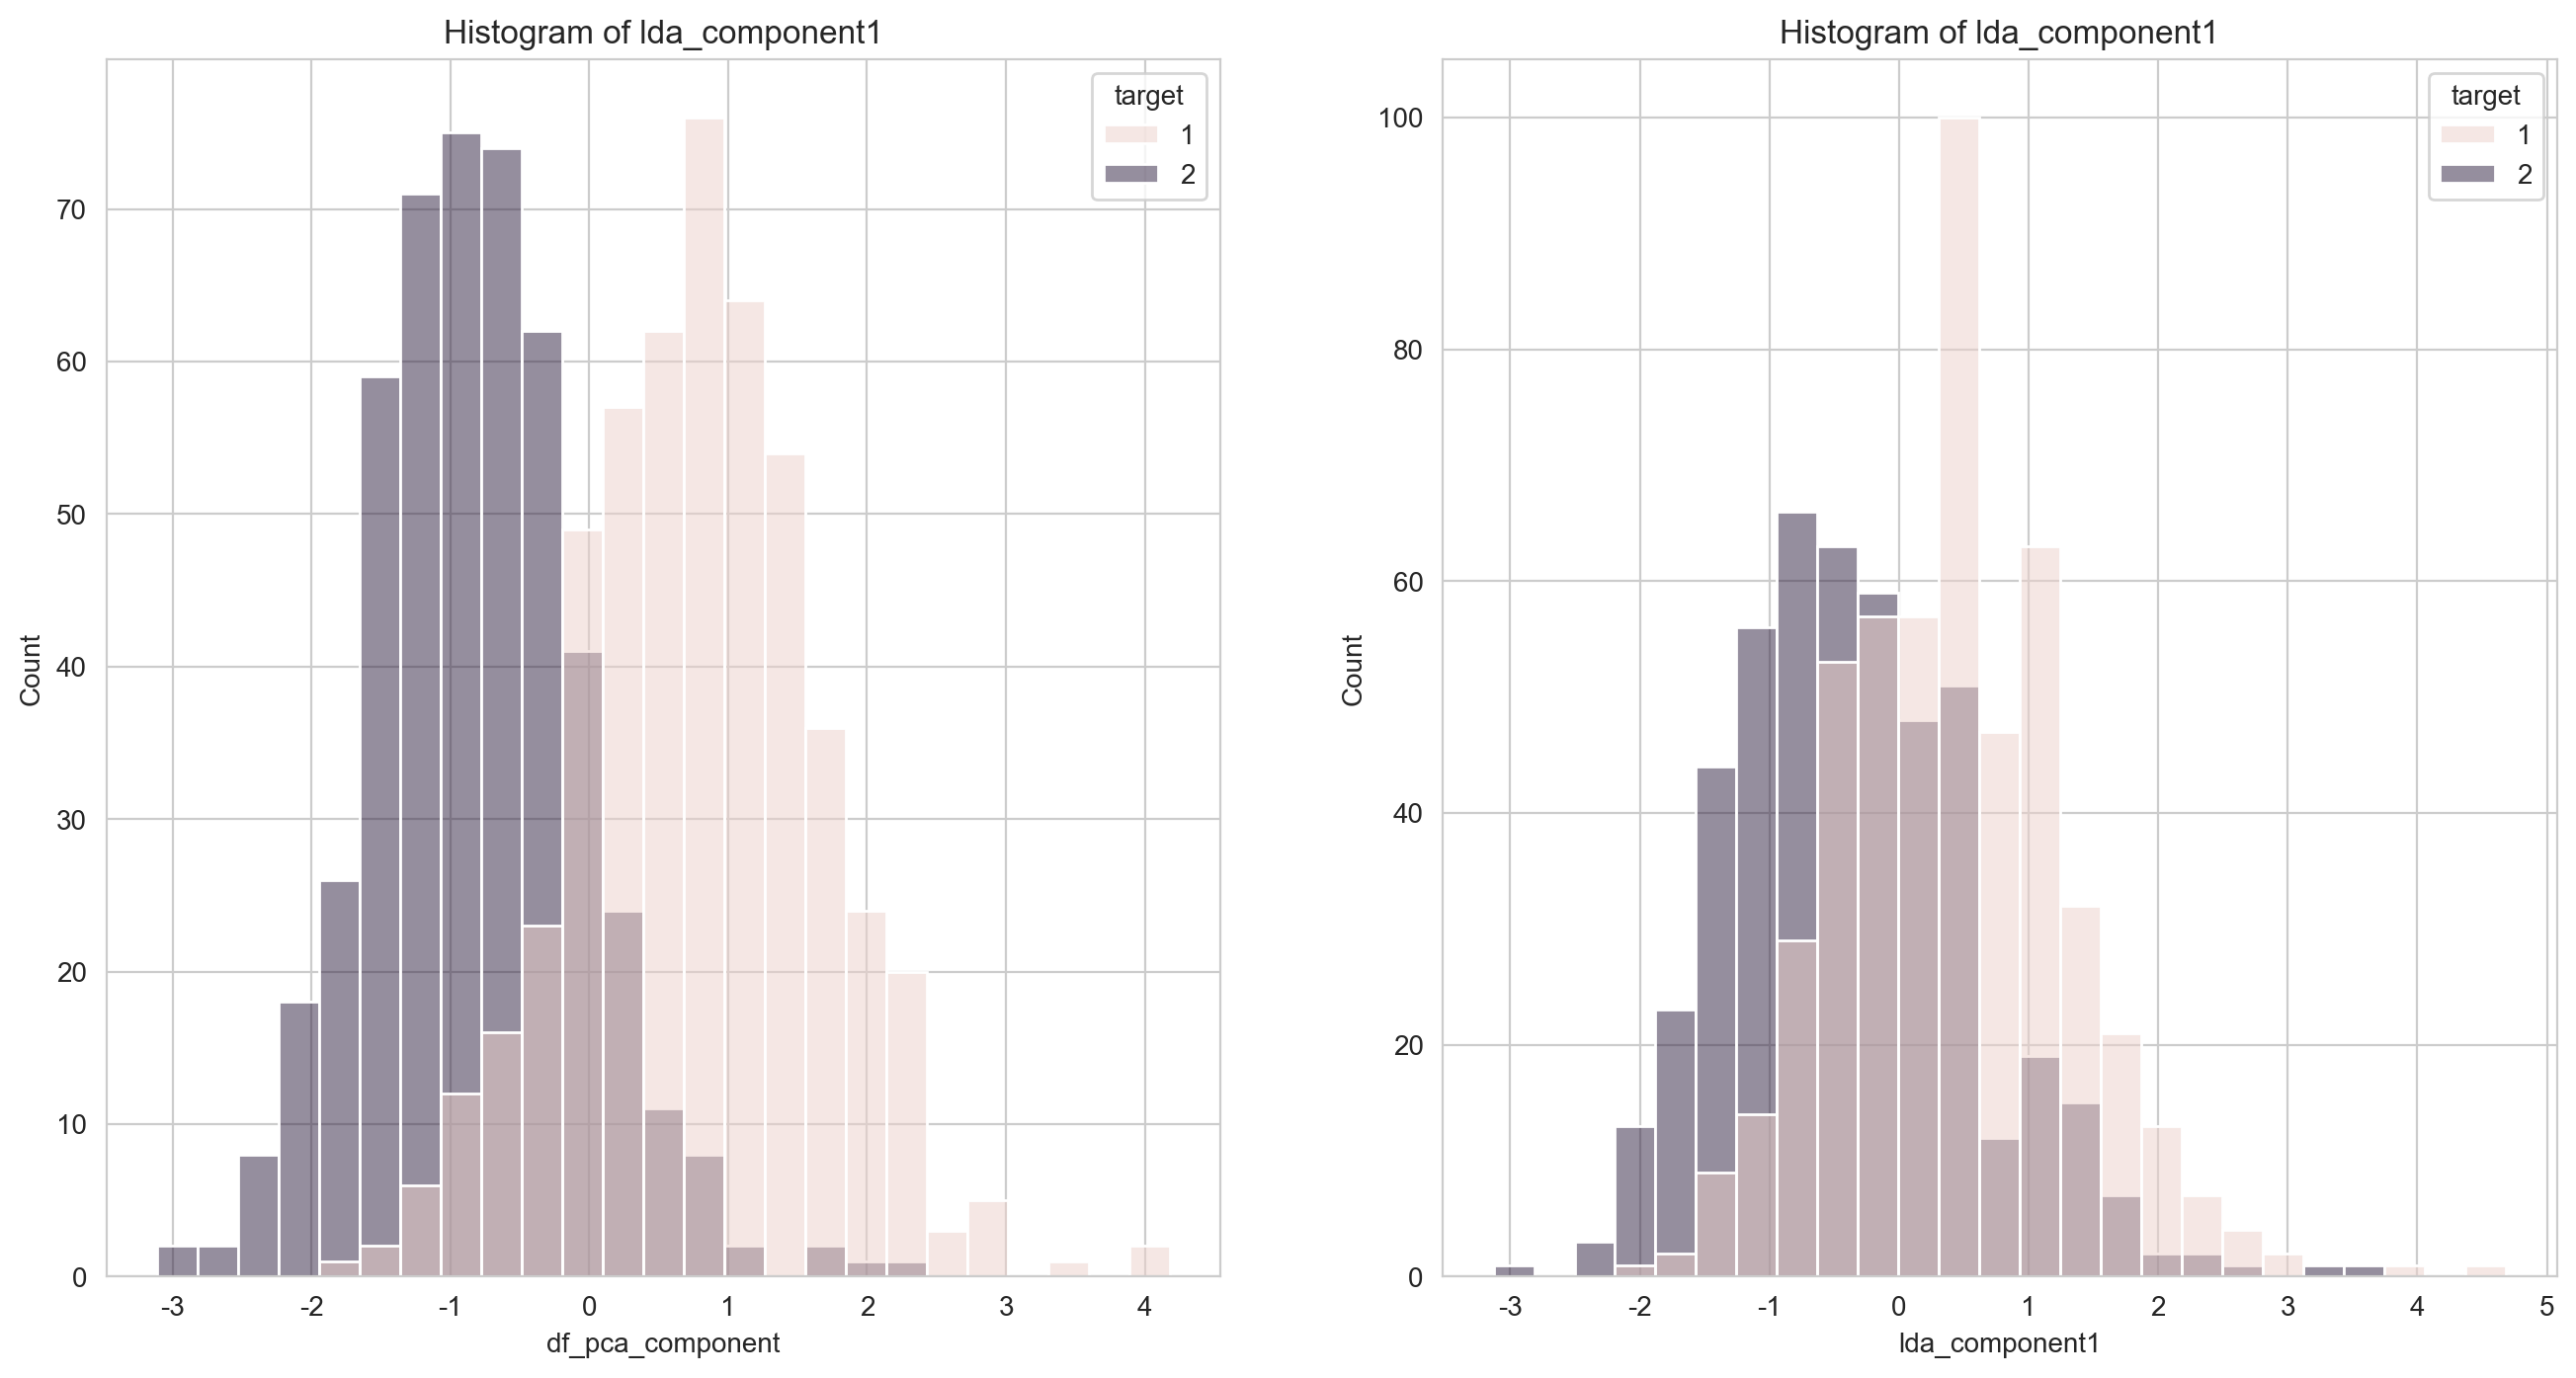

In [155]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=2 , nrows=1)

# 첫 번째 서브플롯
sns.histplot(data=df_pca_component, x='df_pca_component', bins=25, hue='target', ax=axs[0])
axs[0].set_title('Histogram of lda_component1')

# 두 번째 서브플롯
sns.histplot(data=df_lda_component, x='lda_component1', bins=25, hue='target', ax=axs[1])
axs[1].set_title('Histogram of lda_component1')

plt.show()

# 2. SVD와 NMF를 활용한 추천시스템(50점)

 SVD와 NMF를 활용할 수 있는 용도 중 '잠재 요소(Latent Factoring) 기반의 추천 방식'이 있다.

잠재요인 기반의 추천 방식은 행렬 분해(matrix factorization)을 통해 대규모 다차원 행렬을 분해하고 잠재 요인을 찾아내는 방법이다.

잠재 요인(latent factor)은 무엇인지 명확히 알 수는 없다. 장르 같은 아이템 간의 분류, 구매자의 나이대 등등 다양하지만 이렇게 분해하므로써 얻을 수 있는 이점은 공간을 더 잘 활용할 수 있게 된다.

![image.png](attachment:image.png)

논문 Applying SVD on Item-based Filtering(2005)에 따르면 SVD를 통한 CF(협업 필터링, 많은 사용자들로부터 얻은 기호정보에 따라 사용자들의 관심사들을 예측해주는 방법)은 다음의 순서를 거친다.

1. 데이터 전처리(결측값 처리, 정규화)
2. SVD를 통한 차원 축소
3. 루트 시그마와 V.T로 메타 평점 행렬 얻음
4. 메타 평점 행렬에 유사도 계산으로 유사한 것으로 보이는 아이템들의 집합을 분리
5. 아이템에 대한 사용자의 예측치 계산

그러나, 이번 과제에선 1,2의 과정을 거치고 3.4.5의 과정을 원래 행렬의 근사치를 구한 것으로 대체해 추천시스템을 구현해보고자 한다.

### 2-1 데이터 전처리(25점)

** 아래의 코드를 실행해 주세요. **

In [167]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
from sklearn.decomposition import TruncatedSVD

ratings = pd.read_csv("rating.csv")
movies = pd.read_csv("movies.csv")

** 아래의 코드를 실행하면서 데이터를 확인해주세요. **

In [168]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [169]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [170]:
print(movies.shape)
print(ratings.shape)

(9125, 3)
(100004, 4)


1. svd를 사용할 행렬을 만들기 위해선 userid와 movieid, ratings만 필요합니다. 나머지 데이터를 삭제해주세요.(1점)

In [171]:
ratings.drop(columns = 'timestamp', inplace = True)
movies.drop(columns = 'genres', inplace = True)

2. 두 df가 가지고 있는 공통 colums을 기준으로 하나의 df를 만들어 user_movie_data로 저장해주세요.(merge 사용, 1점)

In [174]:
user_movie_data = pd.merge(ratings, movies, on = ['movieId'])

In [175]:
user_movie_data.head()

,userId,movieId,rating,title
0,1,31,2.5,Dangerous Minds (1995)
1,7,31,3.0,Dangerous Minds (1995)
2,31,31,4.0,Dangerous Minds (1995)
3,32,31,4.0,Dangerous Minds (1995)
4,36,31,3.0,Dangerous Minds (1995)


3. ratings에 pivot을 적용해 다음과 같은 테이블을 만들어 주세요.(1점)

![image-4.png](attachment:image-4.png)

In [186]:
user_movie_ratings = ratings.pivot_table(index = ratings.userId, columns = ratings.movieId, values = 'rating').fillna(0)

In [188]:
user_movie_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


4. 다음을 만족하게 코드를 짜주세요.(3점)   
  
a) user_movie_ratings를 먼저 df로 변환하기 위해 reset_index를 사용해주고 그 다음 array로 만들어 matrix에 저장해주세요.

b) user_ratings_mean은 사용자의 평균 평점을 의미합니다.

c) matrix_user_mean은 사용자-영화 점수에 대해 사용자 평균 평점을 뺀 것입니다.

In [280]:
matrix = user_movie_ratings.reset_index().values[:, 1:]
user_ratings_mean = np.mean(matrix, axis=1)
matrix_user_mean = matrix - user_ratings_mean.reshape(-1, 1)

In [281]:
matrix.shape

(671, 9066)

matrix.shape이 (671,9066)이 나와야 합니다. 주의해주세요.

### 2-2. SVD를 통한 차원 축소

1. 특이값을 12개로 하는 truncated SVD를 진행하고 다시 내적을 통해 합쳐주세요. svd_user_predicated_ratings에는 다시 사용자 평균 평점을 더해주어야 합니다.(6점)

In [282]:
svd = TruncatedSVD(n_components=12)
U = svd.fit_transform(matrix_user_mean)
sigma = np.diag(svd.singular_values_)
Vt = svd.components_
svd_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

다음 두 코드를 실행해 user의 movie에 대한 rating data를 비교해보세요.

In [277]:
user_movie_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [278]:
user_movie_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [284]:
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = user_movie_ratings.columns)
df_svd_preds.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,13.011462,8.071400,1.075142,-2.157550,-0.328925,14.105915,4.533319,-2.430097,-1.795552,9.773979,...,-2.650306,-2.972298,-1.164513,-2.905758,-2.806053,-3.075347,-0.194186,-3.207939,-3.166830,-2.195446
1,498.529351,369.666661,130.664308,20.376531,133.939779,304.816699,135.372659,3.812771,51.290064,451.946580,...,-15.897399,-18.173312,-15.106746,-18.540914,-18.673961,-19.746642,-13.522710,-18.094926,-18.166884,-13.519979
2,370.191066,143.611574,28.196662,-4.137973,36.314162,129.631749,20.360624,-7.136408,-5.025597,160.475019,...,-14.465222,-14.329693,-14.602524,-14.986859,-15.468981,-14.121539,-14.892478,-13.331699,-13.608066,-14.907829
3,997.842733,435.641386,136.360150,-16.241940,99.120869,275.209130,129.151386,-56.029929,-8.824333,498.168624,...,-55.770238,-61.539077,-46.273603,-55.356316,-52.378592,-59.044909,-38.754524,-61.698097,-61.543563,-50.228714
4,555.244370,268.758967,52.786165,-7.769934,136.215989,147.442553,92.295860,-8.529715,-20.598164,240.637491,...,-29.076102,-31.008452,-23.063016,-30.648427,-30.320922,-32.379652,-18.942807,-30.639306,-30.904958,-26.848768


In [ ]:
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = user_movie_ratings.columns)
df_svd_preds.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,-0.079686,0.021779,-0.013837,-0.005870,-0.028877,0.032371,0.000715,-0.004428,-0.005219,0.038195,...,-0.004324,-0.004352,0.010478,-0.004256,-0.003944,-0.005674,0.018157,-0.005575,-0.005297,-0.003766
1,1.428452,1.608841,0.529476,0.168278,0.520809,1.107473,0.529719,0.089376,0.296270,1.970031,...,0.013227,-0.002275,0.020680,-0.005245,-0.007644,-0.021019,0.031243,-0.000957,-0.000753,0.026901
2,0.977246,0.396971,0.000299,0.027444,0.021287,0.141458,-0.057134,0.031633,-0.012538,0.383576,...,0.002761,0.004907,-0.014190,-0.000251,-0.006007,-0.003189,-0.026916,0.014637,0.013287,-0.005741
3,1.870844,1.169993,0.252202,0.094831,-0.181713,-0.511953,-0.027820,-0.143080,0.013247,1.461694,...,0.026412,-0.027245,0.054681,0.018450,0.034544,-0.035740,0.088889,-0.019365,-0.017113,0.066559
4,1.182777,0.924903,0.075998,0.061505,0.602680,-0.159825,0.339925,0.081534,-0.079666,0.535018,...,-0.029124,-0.029357,0.009064,-0.029092,-0.030890,-0.057453,0.026344,-0.024027,-0.024614,-0.032752


### 2-3. 사용자에게 추천하기

1. 다음 함수는 사용자에게 영화를 추천하는 함수입니다. 조건에 맞게 빈칸을 채워주세요.(8점)

a) sorted_user_predictions에 df_svd_preds에서 user의 rating 예측값들을 높은 순으로 정렬해주세요.   

b) user_data에 원본 데이터에서 userid에 해당하는 데이터를 뽑아주세요.  

c) for문을 활용해 sorted_user_predictions에 있는 영화들 중 user_data에 없는 영화들을 num_recommendations의 개수 만큼 담아주세요.    

d) r_df에 ori_movies_df에서 r_list에 담긴 movieId에 해당하는 타이틀에 대한 정보를 df로 저장해주고 r_df를 반환해주세요.

In [285]:
def recommend_movies(df_svd_preds, user_id, ori_movies_df, ori_ratings_df, num_recommendations):
    
    sorted_user_predictions = df_svd_preds.iloc[user_id].sort_values(ascending=False)
    
    user_data = ori_ratings_df[ori_ratings_df['userId'] == user_id]
    
    r_list=[]
    
    for i in sorted_user_predictions.index:
        if i not in user_data['movieId'].values :
            r_list.append(i)
            if len(r_list) == num_recommendations :
                break
    
    r_df = ori_movies_df[ori_movies_df['movieId'].isin(r_list)]
    
    return r_df

In [286]:
recommend_movies(df_svd_preds, 330, movies, ratings, 10)

,movieId,title
0,1,Toy Story (1995)
266,296,Pulp Fiction (1994)
321,356,Forrest Gump (1994)
1024,1270,Back to the Future (1985)
2062,2571,"Matrix, The (1999)"
2288,2858,American Beauty (1999)
2374,2959,Fight Club (1999)
3419,4306,Shrek (2001)
3871,4993,"Lord of the Rings: The Fellowship of the Ring,..."
4395,5952,"Lord of the Rings: The Two Towers, The (2002)"


recommend_movies(df_svd_preds, 330, movies, ratings, 10)의 출력 예시입니다.

![image.png](attachment:image.png)

2. 다음 코드를 실행해주세요.(5점)

In [287]:
recommend_movies(df_svd_preds, 77, movies, ratings, 7)

,movieId,title
48,50,"Usual Suspects, The (1995)"
472,527,Schindler's List (1993)
695,858,"Godfather, The (1972)"
1590,2028,Saving Private Ryan (1998)
3367,4226,Memento (2000)
4395,5952,"Lord of the Rings: The Two Towers, The (2002)"
5026,7153,"Lord of the Rings: The Return of the King, The..."


## 2-2. NMF로 새로운 영화 추천하기 (25점)

In [224]:
# 문제아님

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
%matplotlib inline

#### rating.csv를 'ratings' 데이터프레임으로 읽어와주세요. (5점)
- **userId**는 평가에 참여한 유저의 아이디, **movieId**는 평가한 영화의 아이디, **rating**은 평가 점수, **timestamp**는 평가 시점을 나타내는 column입니다. 

In [225]:
ratings

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


#### 자유롭게 EDA 진행하세요 (1점)
- 예1. **userId**와 **movieId**가 각각 몇 개 있는지 (unique values)?
- 예2. **userId**별 영화 평가 참여 횟수 / **movieId**별 평균 평가 점수 확인
- 예3. **ratings** columns 분포 확인 및 시각화

In [236]:
ratings[['userId','movieId']].nunique()

userId      671
movieId    9066
dtype: int64

In [241]:
ratings.groupby('userId').rating.size()

userId
1       20
2       76
3       51
4      204
5      100
      ... 
667     68
668     20
669     37
670     31
671    115
Name: rating, Length: 671, dtype: int64

In [245]:
ratings.groupby('movieId').rating.mean()

movieId
1         3.872470
2         3.401869
3         3.161017
4         2.384615
5         3.267857
            ...   
161944    5.000000
162376    4.500000
162542    5.000000
162672    3.000000
163949    5.000000
Name: rating, Length: 9066, dtype: float64

<Axes: xlabel='rating', ylabel='Density'>

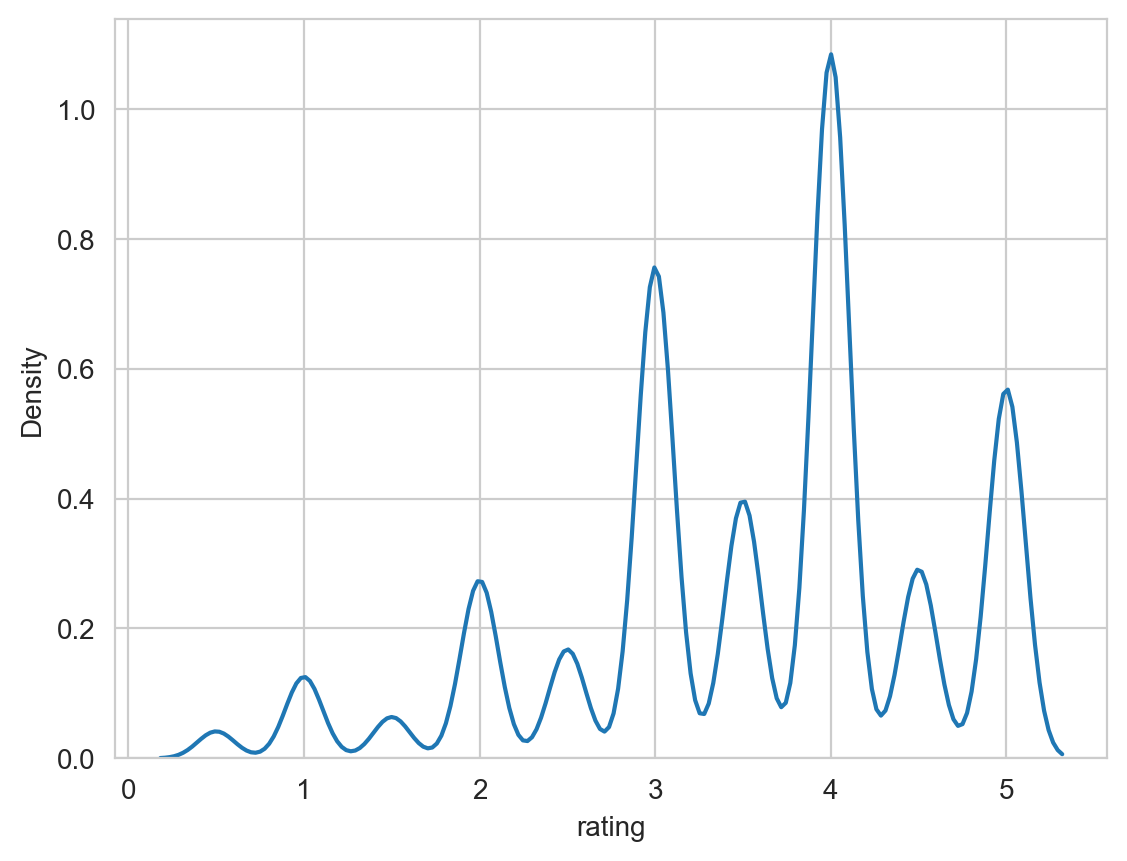

In [247]:
sns.kdeplot(ratings.rating)

#### index가 'movieId', column이 'userId'인 평가점수에 대한 pivot table을 만들어주세요.   (이때, 평가를 하지 않은 영화에 대한 평가점수는 0으로 채워주세요.) (4점)

In [252]:
# pivot by movieId X userId (values = rating)
# fill NAs with 0
ratings_pivot = pd.pivot_table(data = ratings, index = 'movieId', columns = 'userId', values = 'rating', fill_value = 0)
ratings_pivot

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0,0.0,0,0.0,0.0,3,0.0,4,0,...,0,4.0,3.5,0,0,0,0,0,4,5.0
2,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,...,5,0.0,0.0,3,0,0,0,0,0,0.0
3,0.0,0,0.0,0,4.0,0.0,0,0.0,0,0,...,0,0.0,0.0,3,0,0,0,0,0,0.0
4,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0.0
5,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,...,0,0.0,0.0,3,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161944,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0.0
162376,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0.0
162542,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0.0


#### latent feature 수를 변화시키면서 원본 행렬과 추정된 행렬 사이의 RMSE 값 변화를 확인해주세요. (5점)

In [255]:
def find_optimal_n(data):
    '''
    Input : data = 위에서 만든 pivot table

    Return : 설정한 n_component수에 따른 RMSE값을 담은 list
    '''
    df = data.copy()
    # n_component 수 자유롭게 설정
    rank_values = range(1, 10)
    RMSEs=[]
    for rank in rank_values:
        # NMF 모델 (max_iter=1000)
        nmf = NMF(n_components=rank, max_iter=1000)
        # df 분해 (W,H)
        W = nmf.fit_transform(df)
        H = nmf.components_
        
        # 원본 행렬 복원
        nmf_result = np.dot(W, H)

        # df와 복원된 행렬 사이 RMSE값 구해서 RMSEs에 넣어주기
        RMSE = np.sqrt(mean_squared_error(df, nmf_result))
        RMSEs.append(RMSE)

    return RMSEs

In [256]:
# 위에서 정의한 find_optimal_n 함수로 component 수에 따른 RMSE값 확인
find_optimal_n(ratings_pivot)

[0.4251998565125242,
 0.4142583789557615,
 0.4068431431492574,
 0.4020520077667305,
 0.3977489034365909,
 0.3938142124432154,
 0.3905896791448993,
 0.3876992414396165,
 0.3849281182579844]

#### 이제 원본 행렬 분해를 위한 latent feature수를 하나 정해서 NMF기법으로 분해 후 원본 행렬을 복원해주세요. (5점)

In [263]:
# NMF로 원본 행렬 분해 (W,H)
nmf = NMF(n_components=10, max_iter=1000)
W = nmf.fit_transform(ratings_pivot)
H = nmf.components_

# 원본 행렬 복원 (9066행 x 671열)
ratings_restored = np.dot(W, H)
df_restored = pd.DataFrame(ratings_restored, index=ratings_pivot.index, columns=ratings_pivot.columns)

In [264]:
df_restored

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.049749,1.562893,0.786994,2.559149,1.328073,0.341036,1.557387,1.622078,0.506515,0.566906,...,1.454174,0.369202,4.539439,3.377249,0.956159,1.245537,0.294426,0.245011,0.670276,1.613480
2,0.020288,1.572502,0.379309,0.857995,0.759873,0.078288,0.801669,0.324543,0.221235,0.137471,...,1.442367,0.195977,1.554487,2.036682,0.953362,1.184842,0.130912,0.069428,0.445933,0.357856
3,0.016378,0.619919,0.138171,0.453922,0.271936,0.028518,0.344971,0.131523,0.090460,0.078907,...,0.566657,0.058588,0.277164,0.769364,0.373987,0.469370,0.053222,0.046984,0.180010,0.166959
4,0.002934,0.148091,0.027063,0.077219,0.106586,0.007690,0.067466,0.004054,0.021864,0.003553,...,0.138128,0.011789,0.000000,0.269783,0.089299,0.116081,0.015722,0.003550,0.042309,0.022884
5,0.017193,0.545726,0.102337,0.437046,0.663397,0.036946,0.213042,0.024237,0.104179,0.014681,...,0.527341,0.043466,0.278380,1.720386,0.329243,0.411342,0.047300,0.027095,0.148492,0.127923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161944,0.000000,0.000000,0.005823,0.004498,0.009060,0.003061,0.000000,0.008249,0.000662,0.000000,...,0.000614,0.006973,0.148691,0.022719,0.000597,0.000000,0.000000,0.000000,0.000000,0.002126
162376,0.014158,0.000000,0.000000,0.000000,0.000000,0.008359,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.329540,0.000000,0.000000,0.000000,0.000000,0.003966,0.000000,0.000000
162542,0.000000,0.000000,0.000863,0.001410,0.001010,0.000439,0.000458,0.001592,0.000156,0.000290,...,0.000068,0.000938,0.019357,0.002723,0.000077,0.000000,0.000000,0.000088,0.000057,0.000811


- 이제 각 유저별로 기존에 평가하지 않은 영화에 대해서도 평가 점수가 반영된 것을 확인하실 수 있습니다!

#### 임의로 userId 하나를 골라서 해당 유저가 **기존에 평가하지 않은 영화** 중에서 가장 값이 높은 10개의 영화를 (movieId) 추천해주세요. (5점)

In [273]:
# 임의로 userId 하나 고르기 (dtype=int임에 유의)
user_id = 77

# 기존에 평가하지 않은 영화 중 값이 가장 높은 10개 영화 id 선별 
# 참고 : 기존에 평가하지 않은 영화들은 원본 rating 행렬에서 값을 0으로 대체했었습니다!
user_index = ratings_pivot.index.get_loc(user_id)
rated_movies_index = ratings_pivot.columns[ratings_pivot.iloc[user_index, :].isna()]
not_rated_movies_index = np.setdiff1d(np.arange(ratings_pivot.shape[1]), rated_movies_index)
predicted_ratings = df_restored.iloc[user_index, not_rated_movies_index]
top_10_movies = predicted_ratings.sort_values(ascending=False).head(10)
print("Top 10 Recommended Movies for User", user_id)
print(top_10_movies)

Top 10 Recommended Movies for User 77
userId
564    3.465981
518    0.680116
102    0.500094
306    0.433749
232    0.400557
285    0.359765
95     0.307338
119    0.288147
514    0.229864
239    0.219315
Name: 77, dtype: float64
